In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import *

Using TensorFlow backend.


In [2]:
df = pd.read_csv("Dataset/fashion-mnist.csv")
print(df.shape)

(10000, 785)


In [3]:
data = df.values

X = data[:,1:]
Y = data[:,0]

print(X.shape, Y.shape)
print(np.unique(Y,return_counts=True))

(10000, 784) (10000,)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000]))


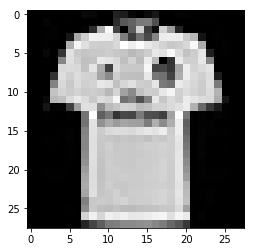

In [4]:
plt.imshow(X[0].reshape(28,28),cmap="gray")
plt.show()

In [5]:
X = X.reshape((-1,28,28,1))/255 # Normalize and Reshape

In [6]:
print(X.shape, Y.shape)

(10000, 28, 28, 1) (10000,)


In [7]:
from keras.utils.np_utils import to_categorical

In [8]:
Y = to_categorical(Y,num_classes=10)
print(X.shape, Y.shape)

(10000, 28, 28, 1) (10000, 10)


In [9]:
Y[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [16]:
# CNN Model
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Conv2D(64,(3,3),activation='relu')
model.add(MaxPool2D(2,2))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(20,(3,3),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))
          
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')
          
model.summary()

SyntaxError: invalid syntax (<ipython-input-16-873714c1d18f>, line 5)

In [12]:
model = Sequential()
model.add(Convolution2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(Convolution2D(64,(3,3),activation='relu'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(2,2))
model.add(Convolution2D(32,(5,5),activation='relu'))
model.add(Convolution2D(8,(5,5),activation='relu'))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
          
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 32)          51232     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 8)           6408      
_________________________________________________________________
flatten_2 (Flatten)          (None, 128)               0         
__________

In [14]:
model.fit(X,Y,epochs=20,shuffle=True,batch_size=256,validation_split=0.2)

Train on 8000 samples, validate on 2000 samples
Epoch 1/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.5524 - acc: 0.7979 - val_loss: 0.5399 - val_acc: 0.8170
Epoch 2/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.5114 - acc: 0.8143 - val_loss: 0.5198 - val_acc: 0.8185
Epoch 3/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.4832 - acc: 0.8259 - val_loss: 0.5081 - val_acc: 0.8300
Epoch 4/20
8000/8000 [==============================] - 16s 2ms/step - loss: 0.4670 - acc: 0.8374 - val_loss: 0.4831 - val_acc: 0.8395
Epoch 5/20
8000/8000 [==============================] - 17s 2ms/step - loss: 0.4466 - acc: 0.8458 - val_loss: 0.4742 - val_acc: 0.8470
Epoch 6/20


KeyboardInterrupt: 